<a href="https://colab.research.google.com/github/AnandMasurkar/HealthCare/blob/master/HealthCare_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Chest X-RAY Image Classification Using Pretrained Model

## Import Required Libraraies

In [0]:
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import imageio
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from keras import regularizers
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Mounting Drive to load data

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


## Load Images Dataset 

### Training Datatset

In [0]:
file_path = glob.glob("/gdrive/My Drive/chest_xray/train/NORMAL/*jpeg")
train_df= pd.DataFrame(file_path[:10000],columns =['link'])

In [0]:
file_path1 = glob.glob("/gdrive/My Drive/chest_xray/train/PNEUMONIA/*jpeg")
train_df1= pd.DataFrame(file_path1[:10000],columns =['link'])

In [0]:
train_df.head()

,link
0,/gdrive/My Drive/chest_xray/train/NORMAL/IM-04...
1,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...
2,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...
3,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...
4,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...


In [0]:
train_df1.head()

,link
0,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...
1,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...
2,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...
3,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...
4,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...


In [0]:
train_df['Label'] = 'Normal'
train_df1['Label'] = 'Pneumonia'

In [0]:
train_df.head()

,link,Label
0,/gdrive/My Drive/chest_xray/train/NORMAL/IM-04...,Normal
1,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...,Normal
2,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...,Normal
3,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...,Normal
4,/gdrive/My Drive/chest_xray/train/NORMAL/NORMA...,Normal


In [0]:
train_df.shape

(1341, 2)

In [0]:
train_df1.head()

,link,Label
0,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
1,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
2,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
3,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
4,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia


In [0]:
train_df1.shape

(3875, 2)

### Concat two dataframes 

In [0]:
training_df = pd.concat([train_df,train_df1],axis=0)

In [0]:
training_df.shape

(5216, 2)

### Shuffle the dataframe

In [0]:
training_df = training_df.sample(frac=1).reset_index(drop=True)
training_df.head()

,link,Label
0,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
1,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
2,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
3,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia
4,/gdrive/My Drive/chest_xray/train/PNEUMONIA/pe...,Pneumonia


### Testing Datatset

In [0]:
file_path = glob.glob("/gdrive/My Drive/chest_xray/test/NORMAL/*jpeg")
test_df= pd.DataFrame(file_path[:10000],columns =['link'])

In [0]:
file_path1 = glob.glob("/gdrive/My Drive/chest_xray/test/PNEUMONIA/*jpeg")
test_df1= pd.DataFrame(file_path1[:10000],columns =['link'])

In [0]:
test_df.head()

,link
0,/gdrive/My Drive/chest_xray/test/NORMAL/IM-003...
1,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...
2,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...
3,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...
4,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...


In [0]:
test_df1.head()

,link
0,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...
1,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...
2,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...
3,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...
4,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...


In [0]:
test_df['Label'] = 'Normal'
test_df1['Label'] = 'Pneumonia'

In [0]:
test_df.head()

,link,Label
0,/gdrive/My Drive/chest_xray/test/NORMAL/IM-003...,Normal
1,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal
2,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal
3,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal
4,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal


In [0]:
test_df.shape

(234, 2)

In [0]:
test_df1.head()

,link,Label
0,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
1,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
2,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
3,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
4,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia


In [0]:
test_df1.shape

(390, 2)

### Concat two dataframes 

In [0]:
testing_df = pd.concat([test_df,test_df1],axis=0)

In [0]:
testing_df.shape

(624, 2)

### Shuffle the dataframe

In [0]:
testing_df = testing_df.sample(frac=1).reset_index(drop=True)
testing_df.head()

,link,Label
0,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
1,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
2,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal
3,/gdrive/My Drive/chest_xray/test/PNEUMONIA/per...,Pneumonia
4,/gdrive/My Drive/chest_xray/test/NORMAL/NORMAL...,Normal


### Creating X and Y for Training and Testing

In [0]:
train_output=[]
for row_index,row in training_df[:2000].iterrows():
            image_temp1 = cv2.imread(row.link)
            image1 = cv2.resize(image_temp1, (150 , 150))
            train_output.append(image1)  

In [0]:
x_train=np.asarray(train_output)

In [0]:
x_train.shape

(2000, 150, 150, 3)

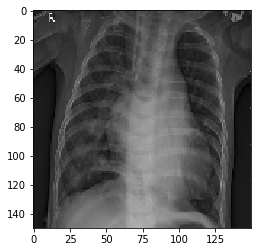

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
for x in range(5) : 
        digit = x_train[x]
        plt.imshow(digit)

In [0]:
test_output=[]
for row_index,row in testing_df[:100].iterrows():
            image_temp1 = cv2.imread(row.link)
            image1 = cv2.resize(image_temp1, (150 , 150))
            test_output.append(image1) 

In [0]:
x_test=np.asarray(test_output)

In [0]:
x_test.shape

(100, 150, 150, 3)

In [0]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train = training_df[:2000]['Label'].values
y_train= encode.fit_transform(y_train)

In [0]:
y_train.shape

(2000,)

In [0]:
y_test = testing_df[:100]['Label'].values
y_test= encode.fit_transform(y_test)

In [0]:
num_classes = 2
y_train1 = keras.utils.to_categorical(y_train,num_classes)
y_test1 = keras.utils.to_categorical(y_test,num_classes)

In [0]:
y_train1.shape

(2000, 2)

In [0]:
y_test1.shape

(100, 2)

## Model Inception v3

In [0]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from sklearn import metrics
from keras.layers import GlobalAveragePooling2D

In [0]:
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)









87916544/87910968 [==============================] - 2s 0us/step


In [0]:
base_model = InceptionV3(weights='imagenet', include_top=False)

In [0]:
from keras.layers import Dense, Flatten, Dropout, AveragePooling2D
from keras.models import Model

trainable_model = base_model.output
trainable_model = GlobalAveragePooling2D() (trainable_model)
trainable_model = Dense(128, activation='relu') (trainable_model)
trainable_model = Dropout(0.5) (trainable_model)
trainable_model = Dense(2, activation='softmax') (trainable_model)

In [0]:
model = Model(inputs=base_model.inputs, outputs = trainable_model)

for layer in base_model.layers:
    layer.trainable = False

In [0]:
model.compile(loss="categorical_crossentropy", optimizer='adam')
model.fit(x_train, y_train1,epochs=1)

Epoch 1/1
2000/2000 [==============================] - 118s 59ms/step - loss: 0.4660


In [0]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

In [0]:
y_true= np.argmax(y_test1,axis=1) 
score_c = metrics.accuracy_score(y_true, pred)
print("Accuracy score: {}".format(score_c))

score_tf_f1_stopping = metrics.f1_score(y_true, pred)
print("F1 score: {}".format(score_tf_f1_stopping))


Accuracy score: 0.59
F1 score: 0.7421383647798743


## Final F1 score achieved is 0.74 for 100 Test cases. Model trained on 2000 images.  